## Problem 1
Analyze the Zachary’s Karate Club graph using Girvan-Newman algorithm. Implement the modularity function and study how modularity changes from round to round. 

In [36]:
import networkx as nx
import networkx.algorithms.community as alg

In [37]:
G = nx.karate_club_graph()
print(G.number_of_nodes())

34


In [38]:
for j in range(G.number_of_nodes()):
    print(f'{j}: {G.nodes[j]["club"]}')

0: Mr. Hi
1: Mr. Hi
2: Mr. Hi
3: Mr. Hi
4: Mr. Hi
5: Mr. Hi
6: Mr. Hi
7: Mr. Hi
8: Mr. Hi
9: Officer
10: Mr. Hi
11: Mr. Hi
12: Mr. Hi
13: Mr. Hi
14: Officer
15: Officer
16: Mr. Hi
17: Mr. Hi
18: Officer
19: Mr. Hi
20: Officer
21: Mr. Hi
22: Officer
23: Officer
24: Officer
25: Officer
26: Officer
27: Officer
28: Officer
29: Officer
30: Officer
31: Officer
32: Officer
33: Officer


In [39]:
groups = alg.girvan_newman(G)
groups = list(groups)

In [40]:
groups

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9},
  {11}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33},
  {9},
  {11},
  {26}),
 ({0, 1, 3, 7, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33},
  {

In [41]:
groups_2 = groups[0]
for community in range(len(groups_2)):
    print(f'Community {community}')
    for member in groups_2[community]:
        print(f'{member}: {G.nodes[member]["club"]}')

Community 0
0: Mr. Hi
1: Mr. Hi
3: Mr. Hi
4: Mr. Hi
5: Mr. Hi
6: Mr. Hi
7: Mr. Hi
10: Mr. Hi
11: Mr. Hi
12: Mr. Hi
13: Mr. Hi
16: Mr. Hi
17: Mr. Hi
19: Mr. Hi
21: Mr. Hi
Community 1
2: Mr. Hi
8: Mr. Hi
9: Officer
14: Officer
15: Officer
18: Officer
20: Officer
22: Officer
23: Officer
24: Officer
25: Officer
26: Officer
27: Officer
28: Officer
29: Officer
30: Officer
31: Officer
32: Officer
33: Officer


In [42]:
def modularity(G, groups):
    m = G.number_of_edges()
    n = G.number_of_nodes()
    degrees = dict(G.degree())
    Q = 0
    for group in groups:
        group_nodes = list(group)
        edges_number = 2 * sum(1 for u, v in G.edges(group_nodes) if v in group_nodes)
        expected = sum([degrees[u] for u in group_nodes]) ** 2/(2 * m)
        Q += (edges_number - expected)
    return Q/(2 * m)

In [43]:
mod_list = []
for division in groups:
    mod_list.append(modularity(G,division))

Text(0.5, 0, 'Girvan-Newman iteration')

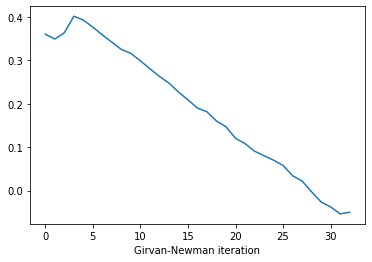

In [44]:
import matplotlib.pyplot as plt
plt.plot(mod_list)
plt.xlabel('Girvan-Newman iteration')

In [45]:
mod_list

[0.35996055226824464,
 0.348783694937541,
 0.3632478632478632,
 0.4012984878369493,
 0.3925049309664694,
 0.376232741617357,
 0.35831689677843515,
 0.34171597633136086,
 0.3247863247863247,
 0.3159105851413542,
 0.2986522024983562,
 0.28040762656147256,
 0.26282051282051266,
 0.24753451676528584,
 0.22682445759368833,
 0.20890861275476658,
 0.1898422090729783,
 0.18129520052596976,
 0.1600920447074293,
 0.1469428007889546,
 0.12031558185404337,
 0.10815253122945431,
 0.09064760026298489,
 0.08029257067718606,
 0.06993754109138725,
 0.057856673241288625,
 0.03418803418803419,
 0.022024983563445105,
 -0.002876397107166334,
 -0.026298487836949366,
 -0.03763971071663378,
 -0.053747534516765276,
 -0.04980276134122286]

In [46]:
groups_4 = groups[3]
for community in range(len(groups_4)):
    print(f'Community {community}')
    for member in groups_4[community]:
        print(f'{member}: {G.nodes[member]["club"]}')

Community 0
0: Mr. Hi
1: Mr. Hi
3: Mr. Hi
7: Mr. Hi
11: Mr. Hi
12: Mr. Hi
13: Mr. Hi
17: Mr. Hi
19: Mr. Hi
21: Mr. Hi
Community 1
2: Mr. Hi
24: Officer
25: Officer
27: Officer
28: Officer
31: Officer
Community 2
4: Mr. Hi
5: Mr. Hi
6: Mr. Hi
10: Mr. Hi
16: Mr. Hi
Community 3
32: Officer
33: Officer
8: Mr. Hi
14: Officer
15: Officer
18: Officer
20: Officer
22: Officer
23: Officer
26: Officer
29: Officer
30: Officer
Community 4
9: Officer


## Problem 2
Create an artificial nested network. Analyze the process of clusters identification using Girvan-Newman algorithm

In [47]:
import random

In [48]:
n_1 = 10
p = 0.7
G1 = nx.erdos_renyi_graph(n_1, p)
G2 = nx.erdos_renyi_graph(n_1, p)
G3 = nx.erdos_renyi_graph(n_1, p)
G4 = nx.erdos_renyi_graph(n_1, p)

In [49]:
n_bridges = 2
G12 = G1.copy()
for u,v in G2.edges():
    G12.add_edge(G1.number_of_nodes() + u, G1.number_of_nodes() + v)

for i in range(n_bridges):
    G12.add_edge(i, G1.number_of_nodes()+i)

G34 = G3.copy()
for u,v in G4.edges():
    G34.add_edge(G3.number_of_nodes() + u, G3.number_of_nodes() + v)    

for i in range(n_bridges):
    G34.add_edge(i, G3.number_of_nodes()+i)

In [50]:
print(G12.number_of_nodes())
print(G34.number_of_nodes())

20
20


In [51]:
G = G12.copy()
for u,v in G34.edges():
    G.add_edge(G12.number_of_nodes() + u, G12.number_of_nodes() + v)
    
for _ in range(n_bridges):
    start = random.choice(list(G12.nodes()))
    G.add_edge(start, G12.number_of_nodes() + start)

In [52]:
print(G.number_of_nodes())

40


In [53]:
list(G.nodes())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 16,
 13,
 15,
 19,
 18,
 17,
 20,
 22,
 24,
 27,
 29,
 30,
 21,
 23,
 28,
 31,
 26,
 25,
 32,
 33,
 34,
 38,
 39,
 35,
 36,
 37]

In [54]:
groups = alg.girvan_newman(G)
groups = list(groups)

In [55]:
groups

[({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
  {20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
  {10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
  {20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
  {10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
  {20, 21, 22, 23, 24, 25, 26, 27, 28, 29},
  {30, 31, 32, 33, 34, 35, 36, 37, 38, 39}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
  {10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
  {20, 21, 22, 23, 24, 25, 27, 28, 29},
  {30, 31, 32, 33, 34, 35, 36, 37, 38, 39},
  {26}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
  {10, 11, 12, 13, 14, 15, 16, 18, 19},
  {17},
  {20, 21, 22, 23, 24, 25, 27, 28, 29},
  {30, 31, 32, 33, 34, 35, 36, 37, 38, 39},
  {26}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
  {10, 11, 12, 13

In [56]:
mod_list = []
for division in groups:
    mod_list.append(modularity(G,division))

Text(0.5, 0, 'Girvan-Newman iteration')

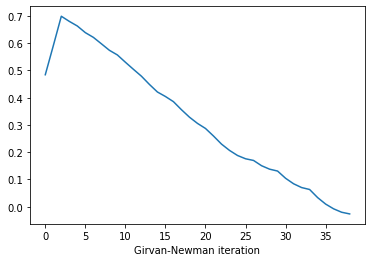

In [57]:
import matplotlib.pyplot as plt
plt.plot(mod_list)
plt.xlabel('Girvan-Newman iteration')

In [58]:
mod_list

[0.4842209684419369,
 0.5907371814743629,
 0.6988653977307955,
 0.67998635997272,
 0.6630603261206524,
 0.6386942773885548,
 0.6214272428544857,
 0.5978671957343915,
 0.5739661479322958,
 0.5568541137082275,
 0.5301320602641206,
 0.5042160084320169,
 0.4789199578399157,
 0.4486948973897948,
 0.4208568417136835,
 0.40439580879161763,
 0.38542377084754176,
 0.3559117118234236,
 0.32847665695331385,
 0.3057226114452229,
 0.28712257424514853,
 0.2594085188170377,
 0.22971045942091886,
 0.20658441316882636,
 0.18795337590675182,
 0.1759253518507037,
 0.1697253394506789,
 0.15044330088660177,
 0.13776427552855106,
 0.1308202616405233,
 0.1043152086304173,
 0.08416516833033669,
 0.07027714055428114,
 0.06317812635625274,
 0.03348006696013393,
 0.009672019344038699,
 -0.007812015624031241,
 -0.02030504061008121,
 -0.026443052886105763]

## Problem 3
Implement the simple modularity maximization algoritm. Analyze how it works for the divizion of the  Zachary’s Karate Club graph

In [59]:
def simple_modularity_maximization(G, eps_stop = 0.05):
    n = G.number_of_nodes()
    n1 = n // 2
    nodes = list(G.nodes())
    group_1 = random.sample(nodes, k = n1)
    group_2 = [x for x in nodes if not x in group_1]
    
    eps_mod = 1
    round_mods = [modularity(G, [group_1, group_2])]
    
    i = 0
    while eps_mod > eps_stop:
        i += 1
        print(i)
        groups_list = [group_1.copy()]
        mod_list = [modularity(G, [group_1, group_2])]
        nodes_dict = {node: False for node in nodes}
        sum_nodes= sum([nodes_dict[node] for node in nodes])
        while (sum_nodes < n):
            nodes_to_move = [x for x in nodes if not nodes_dict[x]]
            mod_list_tmp = {}
            for node in nodes_to_move:
                g1_tmp = group_1.copy()
                g2_tmp = group_2.copy()
                if node in group_1:
                    g1_tmp.remove(node)
                    g2_tmp.append(node)
                else:
                    g2_tmp.remove(node)
                    g1_tmp.append(node)
                mod_tmp = modularity(G, [g1_tmp, g2_tmp])
                mod_list_tmp[node] = mod_tmp
            node, mod = max(mod_list_tmp.items(), key = lambda x: x[1])
            if node in group_1:
                group_1.remove(node)
                group_2.append(node)
            else:
                group_2.remove(node)
                group_1.append(node)
            
            nodes_dict[node] = True
            sum_nodes = sum([nodes_dict[node] for node in nodes])
            groups_list.append(group_1.copy())
            mod_list.append(mod)
        index_min = mod_list.index(max(mod_list))
        group_1 = groups_list[index_min]
        group_2 = [x for x in nodes if not x in group_1]
        round_mods.append(max(mod_list))
        eps_mod = abs(round_mods[-1]/round_mods[-2] - 1)
        print(max(mod_list))
    return group_1, group_2

In [60]:
G = nx.karate_club_graph()

In [61]:
groups_2 = simple_modularity_maximization(G, 0.001)

1
0.3717948717948718
2
0.3717948717948718


In [62]:
for community in range(len(groups_2)):
    print(f'Community {community}')
    for member in groups_2[community]:
        print(f'{member}: {G.nodes[member]["club"]}')

Community 0
29: Officer
27: Officer
30: Officer
18: Officer
24: Officer
32: Officer
33: Officer
23: Officer
14: Officer
15: Officer
20: Officer
22: Officer
26: Officer
25: Officer
31: Officer
28: Officer
8: Mr. Hi
Community 1
0: Mr. Hi
1: Mr. Hi
2: Mr. Hi
3: Mr. Hi
4: Mr. Hi
5: Mr. Hi
6: Mr. Hi
7: Mr. Hi
9: Officer
10: Mr. Hi
11: Mr. Hi
12: Mr. Hi
13: Mr. Hi
16: Mr. Hi
17: Mr. Hi
19: Mr. Hi
21: Mr. Hi


## Problem 4
Create an artificial nested network. Analyze the process of clusters identification using simple modularity maximization

In [63]:
n_1 = 10
p = 0.7
G1 = nx.erdos_renyi_graph(n_1, p)
G2 = nx.erdos_renyi_graph(n_1, p)
G3 = nx.erdos_renyi_graph(n_1, p)
G4 = nx.erdos_renyi_graph(n_1, p)

n_bridges = 2
G12 = G1.copy()
for u,v in G2.edges():
    G12.add_edge(G1.number_of_nodes() + u, G1.number_of_nodes() + v)

for i in range(n_bridges):
    G12.add_edge(i, G1.number_of_nodes()+i)

G34 = G3.copy()
for u,v in G4.edges():
    G34.add_edge(G3.number_of_nodes() + u, G3.number_of_nodes() + v)    

for i in range(n_bridges):
    G34.add_edge(i, G3.number_of_nodes()+i)

G = G12.copy()
for u,v in G34.edges():
    G.add_edge(G12.number_of_nodes() + u, G12.number_of_nodes() + v)
    
for _ in range(n_bridges):
    start = random.choice(list(G12.nodes()))
    G.add_edge(start, G12.number_of_nodes() + start)

In [64]:
groups_2 = simple_modularity_maximization(G, 0.001)

1
0.46816568047337276
2
0.46816568047337276


In [65]:
for group in groups_2:
    print(sorted(group))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [66]:
G_sub1 = nx.subgraph(G, groups_2[0])

In [67]:
groups_12 = simple_modularity_maximization(G_sub1, 0.001)

1
0.48473370064279153
2
0.48473370064279153


In [68]:
for group in groups_12:
    print(sorted(group))

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [69]:
G_sub2 = nx.subgraph(G, groups_2[1])
groups_34 = simple_modularity_maximization(G_sub2, 0.001)

1
0.4831944444444444
2
0.4831944444444444


In [70]:
for group in groups_34:
    print(sorted(group))

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
